In [2]:
import os
os.chdir(r'C:\Users\Admin\Desktop')

In [3]:
import pandas as pd
df=pd.read_csv('Salary_Data.csv')
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [4]:
df.shape

(30, 2)

In [5]:
df.dtypes

YearsExperience    float64
Salary             float64
dtype: object

In [6]:
x=df.iloc[:,:-1].values
y=df.iloc[:,1:].values

In [7]:
df.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


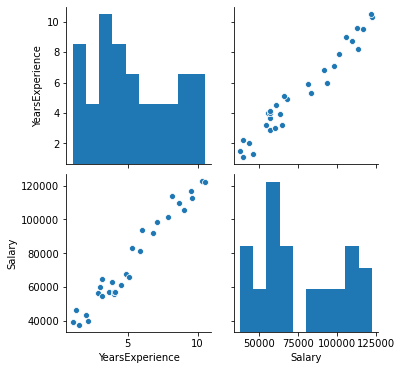

In [10]:
import seaborn as sns
sns.pairplot(df)

In [13]:
print('independent variable',x)
print('\n dependent variable',y)

independent variable [[ 1.1]
 [ 1.3]
 [ 1.5]
 [ 2. ]
 [ 2.2]
 [ 2.9]
 [ 3. ]
 [ 3.2]
 [ 3.2]
 [ 3.7]
 [ 3.9]
 [ 4. ]
 [ 4. ]
 [ 4.1]
 [ 4.5]
 [ 4.9]
 [ 5.1]
 [ 5.3]
 [ 5.9]
 [ 6. ]
 [ 6.8]
 [ 7.1]
 [ 7.9]
 [ 8.2]
 [ 8.7]
 [ 9. ]
 [ 9.5]
 [ 9.6]
 [10.3]
 [10.5]]

 dependent variable [[ 39343.]
 [ 46205.]
 [ 37731.]
 [ 43525.]
 [ 39891.]
 [ 56642.]
 [ 60150.]
 [ 54445.]
 [ 64445.]
 [ 57189.]
 [ 63218.]
 [ 55794.]
 [ 56957.]
 [ 57081.]
 [ 61111.]
 [ 67938.]
 [ 66029.]
 [ 83088.]
 [ 81363.]
 [ 93940.]
 [ 91738.]
 [ 98273.]
 [101302.]
 [113812.]
 [109431.]
 [105582.]
 [116969.]
 [112635.]
 [122391.]
 [121872.]]


In [14]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [15]:
l=[(x_train[:,:5]),
(y_train[:,:5]),
(x_test[:,:5]),(y_test[:,:5])]
pd.DataFrame(l)

,0
0,"[[7.9], [2.9], [5.1], [3.2], [4.5], [8.2], [6...."
1,"[[101302.0], [56642.0], [66029.0], [64445.0], ..."
2,"[[1.5], [10.3], [4.1], [3.9], [9.5], [8.7], [9..."
3,"[[37731.0], [122391.0], [57081.0], [63218.0], ..."


In [16]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(21, 1)
(9, 1)
(21, 1)
(9, 1)


In [17]:
len(x_train)/len(x)

0.7

In [18]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression(fit_intercept=True,normalize=True)
regressor.fit(x_train,y_train),
y_pred=regressor.predict(x_test)
print('\n predicted value',y_pred)




 predicted value [[ 40817.78327049]
 [123188.08258899]
 [ 65154.46261459]
 [ 63282.41035735]
 [115699.87356004]
 [108211.66453108]
 [116635.89968866]
 [ 64218.43648597]
 [ 76386.77615802]]


In [19]:
# accuracy
import numpy as np
import pandas as pd
from sklearn import metrics
print('accuracy',metrics.r2_score(y_test,y_pred))
error_df=pd.DataFrame({"actual":['\n',y_test],
                       "predict":['\n',y_pred],
                       "error":['\n',np.abs(y_test-y_pred)]})

 

accuracy 0.9740993407213511


In [20]:
error_df

,actual,predict,error
0,\n,\n,\n
1,"[[37731.0], [122391.0], [57081.0], [63218.0], ...","[[40817.783270488115], [123188.08258899229], [...","[[3086.783270488115], [797.0825889922853], [80..."


In [24]:
regressor.coef_

array([[9360.26128619]])

In [25]:
regressor.intercept_

array([26777.3913412])

In [29]:
residuals=(y_test - y_pred)
residuals

array([[-3086.78327049],
       [ -797.08258899],
       [-8073.46261459],
       [  -64.41035735],
       [ 1269.12643996],
       [ 1219.33546892],
       [-4000.89968866],
       [-8424.43648597],
       [ 6701.22384198]])

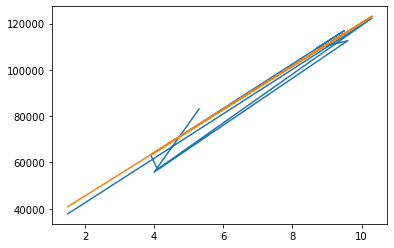

In [23]:
#plottng 
import matplotlib.pyplot as plt
act=plt.plot(x_test,y_test)
pred=plt.plot(x_test,y_pred)
